<a href="https://colab.research.google.com/github/ironmanmark23/NSE_Stock_Analysis_and_price_prediction_usin_XGboost/blob/master/NSE_stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   **Name**: Subham Chakraborty 
*   **Email**: subhamchakraborty01748@gmail.com
*   **github**: https://github.com/ironmanmark23
*   **kaggle**: https://www.kaggle.com/ironmanmark23
*   **linkedin**:https://www.linkedin.com/in/subham-chakraborty-803682143/






In [ ]:
#installing required dependencies
!pip install nsepy
#!pip install pyEX
!pip install altair vega_datasets

  Created wheel for nsepy: filename=nsepy-0.8-cp36-none-any.whl size=36084 sha256=2f67cb247f2d5d4d8ad5f70edb8899e7ab3e95a815657384de75084853f2890d
  Stored in directory: /root/.cache/pip/wheels/05/2c/72/5324e267426eea65dec0c21a12a48b15887c0cf686c7a8fe11
Successfully built nsepy


In [ ]:
#importing the libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import nsepy as n
from nsepy import get_history
from datetime import date
from datetime import datetime
import dateutil.relativedelta
%matplotlib inline

ModuleNotFoundError: ignored

## **Data Selection :**

**DATASET :-**The datasets used in this project are available in the below given github link: https://github.com/ironmanmark23/NSE_Stock_Analysis_and_price_prediction_usin_XGboost

In [ ]:
#from_date = date(2015,1,1)
#to_date = date(2015,1,10)
#ticker1 = "RELIANCE"
#ticker2="BHARTARTL"
#jio = get_history(symbol=ticker1,start=from_date, end=to_date)
#airtel = get_history(symbol=ticker2,start=from_date,end=to_date)
#nifty = get_history(symbol="NIFTY 500", start=from_date,end=to_date,index=True)

In [ ]:
#commands used to download the required datasets
#!nsecli history --symbol RELIANCE -s 2015-01-01 -e 2016-01-01 -o jio.csv
#!nsecli history --symbol BHARTIARTL -s 2015-01-01 -e 2016-01-31 -o airtel.csv
#!nsecli history --symbol "NIFTY 500" -s 2015-01-01 -e 2016-01-01 -o nifty.csv --index

In [ ]:
#import files from PC
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving airtel.csv to airtel.csv
Saving infy.csv to infy.csv
Saving jio.csv to jio.csv
Saving nifty.csv to nifty.csv
Saving tcs.csv to tcs.csv
User uploaded file "airtel.csv" with length 30367 bytes
User uploaded file "infy.csv" with length 161748 bytes
User uploaded file "jio.csv" with length 29977 bytes
User uploaded file "nifty.csv" with length 16831 bytes
User uploaded file "tcs.csv" with length 163274 bytes


In [ ]:
#reading imported data files
jio = pd.read_csv('jio.csv',parse_dates=['Date'])
airtel = pd.read_csv('airtel.csv', parse_dates=['Date'])
nifty500 = pd.read_csv('nifty.csv', parse_dates=['Date'])
stocks = [jio, airtel, nifty500]


jio.name = 'jio'
airtel.name = 'airtel'
nifty500.name = 'nifty500'

In [ ]:
jio["Date"] = pd.to_datetime(jio["Date"])
airtel["Date"] = pd.to_datetime(airtel["Date"])
nifty500["Date"] = pd.to_datetime(nifty500["Date"])

In [ ]:
def datetime_tick(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df['Date'].dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = df.Date.dt.weekofyear
    
    
    
for i in range(len(stocks)):
    datetime_tick(stocks[i])

In [ ]:
jio.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Year,Month,Day,WeekOfYear
count,249.00000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,2.490000e+02,2.490000e+02,249.000000,2.490000e+02,249.000000,249.000000,249.000000,249.000000,249.000000
mean,915.46245,916.423695,926.808032,905.739558,915.865863,915.961245,916.362249,3.478561e+06,3.178996e+14,84487.867470,1.929244e+06,0.542027,2015.004016,6.485944,15.767068,27.188755
std,56.70298,55.867315,56.426496,57.218298,56.992211,57.033557,57.123076,1.592259e+06,1.455034e+14,33376.105591,1.032537e+06,0.083095,0.063372,3.460725,8.823651,15.094611
min,810.75000,816.600000,817.700000,796.450000,810.000000,810.750000,807.780000,2.995110e+05,2.781933e+13,8723.000000,9.803000e+04,0.306300,2015.000000,1.000000,1.000000,1.000000
25%,869.70000,872.100000,882.000000,858.600000,870.100000,869.700000,870.090000,2.459446e+06,2.220089e+14,63045.000000,1.295745e+06,0.493000,2015.000000,3.000000,8.000000,14.000000
50%,902.95000,905.000000,911.000000,892.000000,902.550000,903.050000,901.510000,3.127549e+06,2.898153e+14,79567.000000,1.737934e+06,0.538200,2015.000000,7.000000,16.000000,27.000000
75%,961.25000,963.600000,973.000000,949.750000,962.300000,963.500000,962.900000,4.150045e+06,3.728217e+14,99399.000000,2.323884e+06,0.593200,2015.000000,9.000000,23.000000,40.000000
max,1050.40000,1053.500000,1067.850000,1041.200000,1051.900000,1050.400000,1051.890000,1.131584e+07,1.090509e+15,265987.000000,7.999100e+06,0.778900,2016.000000,12.000000,31.000000,53.000000


In [ ]:
airtel.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Year,Month,Day,WeekOfYear
count,249.00000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,2.490000e+02,2.490000e+02,249.000000,2.490000e+02,249.000000,249.000000,249.000000,249.000000,249.000000
mean,374.32751,374.854217,380.065462,368.714659,374.130120,374.278514,374.423293,4.578055e+06,1.735012e+14,63464.172691,2.937685e+06,0.613948,2015.004016,6.485944,15.767068,27.188755
std,34.50326,34.635079,35.386319,34.403060,34.367561,34.542735,34.872395,4.726258e+06,1.968538e+14,32042.444934,3.729904e+06,0.104280,0.063372,3.460725,8.823651,15.094611
min,306.15000,306.150000,310.000000,304.150000,306.000000,306.150000,306.410000,1.392260e+05,4.629584e+12,2708.000000,5.077200e+04,0.190200,2015.000000,1.000000,1.000000,1.000000
25%,347.30000,348.000000,350.900000,342.400000,347.050000,347.300000,346.200000,2.680583e+06,9.932424e+13,42776.000000,1.608171e+06,0.556200,2015.000000,3.000000,8.000000,14.000000
50%,368.25000,366.250000,373.800000,359.500000,367.500000,368.250000,365.960000,3.736249e+06,1.409613e+14,58470.000000,2.254602e+06,0.619100,2015.000000,7.000000,16.000000,27.000000
75%,403.00000,403.800000,412.000000,398.750000,402.800000,403.000000,403.820000,5.188517e+06,2.043101e+14,76119.000000,3.322870e+06,0.681400,2015.000000,9.000000,23.000000,40.000000
max,445.25000,442.500000,452.450000,437.850000,445.000000,445.250000,446.390000,6.777262e+07,2.864459e+15,282077.000000,5.433594e+07,0.920800,2016.000000,12.000000,31.000000,53.000000


In [ ]:
nifty500.describe()

,Open,High,Low,Close,Volume,Turnover,Year,Month,Day,WeekOfYear
count,249.000000,249.000000,249.000000,249.000000,2.490000e+02,2.490000e+02,249.000000,249.000000,249.000000,249.000000
mean,6875.605020,6905.263454,6828.548394,6864.991968,7.061210e+08,1.564404e+11,2015.004016,6.485944,15.767068,27.188755
std,235.394758,230.754172,234.942723,233.209068,1.514179e+08,3.928041e+10,0.063372,3.460725,8.823651,15.094611
min,6344.850000,6436.100000,6286.700000,6323.400000,1.256074e+08,2.055530e+10,2015.000000,1.000000,1.000000,1.000000
25%,6680.300000,6710.250000,6640.800000,6657.250000,6.060653e+08,1.319726e+11,2015.000000,3.000000,8.000000,14.000000
50%,6877.350000,6904.900000,6836.650000,6873.400000,6.770895e+08,1.515428e+11,2015.000000,7.000000,16.000000,27.000000
75%,7086.750000,7117.200000,7032.200000,7076.650000,7.819492e+08,1.718591e+11,2015.000000,9.000000,23.000000,40.000000
max,7426.800000,7428.100000,7288.050000,7345.550000,1.492715e+09,4.151866e+11,2016.000000,12.000000,31.000000,53.000000


In [ ]:
jio.head()


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Year,Month,Day,WeekOfYear
0,2015-01-01,RELIANCE,EQ,891.15,886.3,892.00,883.65,888.00,887.90,887.62,677439,6.013059e+13,16263,286377,0.4227,2015,1,1,1
1,2015-01-02,RELIANCE,EQ,887.90,888.1,896.05,884.30,884.95,885.55,889.39,1675827,1.490461e+14,31269,1048543,0.6257,2015,1,2,1
2,2015-01-05,RELIANCE,EQ,885.55,885.0,890.90,874.10,875.55,875.85,881.88,2309591,2.036781e+14,67035,1393132,0.6032,2015,1,5,2
3,2015-01-06,RELIANCE,EQ,875.85,870.0,873.00,832.00,832.50,836.10,847.60,4258043,3.609133e+14,120767,2353273,0.5527,2015,1,6,2
4,2015-01-07,RELIANCE,EQ,836.10,837.1,858.80,837.00,858.00,854.30,849.81,4736315,4.024972e+14,125939,2885468,0.6092,2015,1,7,2


In [ ]:
airtel.head()


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Year,Month,Day,WeekOfYear
0,2015-01-01,BHARTIARTL,EQ,352.70,354.40,364.90,351.65,363.00,362.90,358.90,2217263,7.957697e+13,25445,1042436,0.4701,2015,1,1,1
1,2015-01-02,BHARTIARTL,EQ,362.90,363.80,367.00,362.00,365.15,365.05,364.73,2519814,9.190425e+13,46461,1493017,0.5925,2015,1,2,1
2,2015-01-05,BHARTIARTL,EQ,365.05,366.25,366.25,355.60,357.20,356.95,359.31,1446759,5.198369e+13,27848,688766,0.4761,2015,1,5,2
3,2015-01-06,BHARTIARTL,EQ,356.95,356.10,356.10,348.40,354.50,354.15,353.79,3530178,1.248926e+14,59463,2725330,0.7720,2015,1,6,2
4,2015-01-07,BHARTIARTL,EQ,354.15,351.95,358.00,350.50,355.00,355.00,355.41,4415546,1.569343e+14,117150,3461811,0.7840,2015,1,7,2


In [ ]:
nifty500.head()

,Date,Open,High,Low,Close,Volume,Turnover,Year,Month,Day,WeekOfYear
0,2015-01-01,6767.60,6794.25,6755.00,6786.10,440905954,7.133120e+10,2015,1,1,1
1,2015-01-02,6792.40,6883.05,6792.40,6866.45,617743719,1.216331e+11,2015,1,2,1
2,2015-01-05,6877.35,6913.25,6848.25,6857.45,614330577,1.231650e+11,2015,1,5,2
3,2015-01-06,6817.65,6817.65,6646.40,6656.80,716905569,1.563956e+11,2015,1,6,2
4,2015-01-07,6653.65,6680.50,6605.40,6644.95,723294637,1.507763e+11,2015,1,7,2


**PART 1 : Rolling window analysis**

In [ ]:
X=[4,16,28,40,52]#weeks

In [ ]:
def index_opt(stock):
    stock.index = stock['Date']
    return stock

In [ ]:
index_opt(jio)
index_opt(airtel)
index_opt(nifty500)

,Date,Open,High,Low,Close,Volume,Turnover,Year,Month,Day,WeekOfYear
Date,,,,,,,,,,,
2015-01-01,2015-01-01,6767.60,6794.25,6755.00,6786.10,440905954,7.133120e+10,2015,1,1,1
2015-01-02,2015-01-02,6792.40,6883.05,6792.40,6866.45,617743719,1.216331e+11,2015,1,2,1
2015-01-05,2015-01-05,6877.35,6913.25,6848.25,6857.45,614330577,1.231650e+11,2015,1,5,2
2015-01-06,2015-01-06,6817.65,6817.65,6646.40,6656.80,716905569,1.563956e+11,2015,1,6,2
2015-01-07,2015-01-07,6653.65,6680.50,6605.40,6644.95,723294637,1.507763e+11,2015,1,7,2
...,...,...,...,...,...,...,...,...,...,...,...
2015-12-28,2015-12-28,6663.45,6707.25,6663.45,6700.70,537406257,1.120892e+11,2015,12,28,53
2015-12-29,2015-12-29,6707.65,6717.25,6685.45,6705.25,619767104,1.147876e+11,2015,12,29,53
2015-12-30,2015-12-30,6715.80,6718.30,6681.00,6685.45,583010604,1.071623e+11,2015,12,30,53


In [ ]:
X=[4,16,28,40,52]
plt.figure(figsize=[20,6])
def plot_ts(stock, weeks = X):#function for calculating moving Average and plotting them
    
    df = pd.DataFrame()
    df['Close'] = stock['Close'].resample('W').mean() 
     
    for i in range(len(weeks)):
        sma = df['Close'].rolling(weeks[i]).mean() # M.A using inbuilt function
        df[" SMA for " + str(weeks[i])+ " Weeks"] = sma
        print('Moving Avg.s : for {0} weeks: \n\n {1}' .format(weeks[i], df['Close']))
    df.plot(title="Simple Moving Averages for {} \n\n" .format(stock.name))

<Figure size 1440x432 with 0 Axes>

RELIANCE JIO

Moving Avg.s : for 4 weeks: 

 Date
2015-01-04     886.725000
2015-01-11     853.720000
2015-01-18     852.470000
2015-01-25     892.020000
2015-02-01     910.137500
2015-02-08     921.610000
2015-02-15     901.210000
2015-02-22     894.900000
2015-03-01     849.791667
2015-03-08     884.462500
2015-03-15     859.730000
2015-03-22     855.570000
2015-03-29     835.160000
2015-04-05     824.266667
2015-04-12     864.570000
2015-04-19     925.337500
2015-04-26     879.560000
2015-05-03     863.212500
2015-05-10     884.760000
2015-05-17     880.380000
2015-05-24     899.310000
2015-05-31     883.440000
2015-06-07     903.540000
2015-06-14     888.390000
2015-06-21     942.500000
2015-06-28     996.570000
2015-07-05    1002.930000
2015-07-12    1000.920000
2015-07-19    1012.270000
2015-07-26    1030.660000
2015-08-02    1002.720000
2015-08-09     988.300000
2015-08-16     955.620000
2015-08-23     934.730000
2015-08-30     854.530000
2015-09-06     847.010000
2015-09-13     856.760000
20

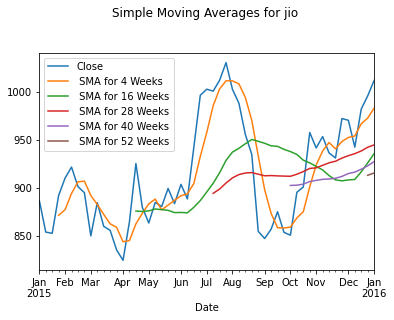

In [ ]:
plot_ts(jio)

BHARTI AIRTEL

Moving Avg.s : for 4 weeks: 

 Date
2015-01-04    363.975000
2015-01-11    356.610000
2015-01-18    346.650000
2015-01-25    365.690000
2015-02-01    379.325000
2015-02-08    366.550000
2015-02-15    355.210000
2015-02-22    354.850000
2015-03-01    349.791667
2015-03-08    349.362500
2015-03-15    379.800000
2015-03-22    383.880000
2015-03-29    389.650000
2015-04-05    395.000000
2015-04-12    408.770000
2015-04-19    416.200000
2015-04-26    399.800000
2015-05-03    390.050000
2015-05-10    392.350000
2015-05-17    389.660000
2015-05-24    397.470000
2015-05-31    407.560000
2015-06-07    417.480000
2015-06-14    411.780000
2015-06-21    422.140000
2015-06-28    424.880000
2015-07-05    425.330000
2015-07-12    429.690000
2015-07-19    423.890000
2015-07-26    436.180000
2015-08-02    416.270000
2015-08-09    415.260000
2015-08-16    398.730000
2015-08-23    381.570000
2015-08-30    349.130000
2015-09-06    347.940000
2015-09-13    349.700000
2015-09-20    355.387500
2015-09-27    

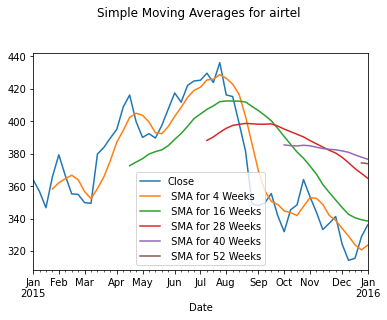

In [ ]:
plot_ts(airtel)

NIFTY 500

Moving Avg.s : for 4 weeks: 

 Date
2015-01-04    6826.275000
2015-01-11    6739.530000
2015-01-18    6860.510000
2015-01-25    7092.900000
2015-02-01    7223.637500
2015-02-08    7105.040000
2015-02-15    7039.690000
2015-02-22    7213.950000
2015-03-01    7160.933333
2015-03-08    7307.087500
2015-03-15    7148.460000
2015-03-22    7099.000000
2015-03-29    6929.530000
2015-04-05    7002.766667
2015-04-12    7188.960000
2015-04-19    7196.900000
2015-04-26    6910.590000
2015-05-03    6762.475000
2015-05-10    6755.710000
2015-05-17    6786.520000
2015-05-24    6933.630000
2015-05-31    6902.890000
2015-06-07    6773.160000
2015-06-14    6616.270000
2015-06-21    6688.080000
2015-06-28    6903.270000
2015-07-05    6940.150000
2015-07-12    6977.010000
2015-07-19    7077.460000
2015-07-26    7114.510000
2015-08-02    6998.190000
2015-08-09    7167.480000
2015-08-16    7066.840000
2015-08-23    7061.780000
2015-08-30    6585.750000
2015-09-06    6529.670000
2015-09-13    6453.750000
20

<Figure size 1440x432 with 0 Axes>

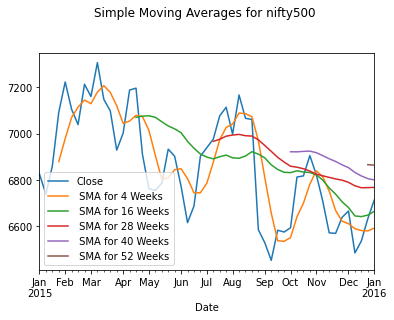

In [ ]:
plt.figure(figsize=[20,6])
plot_ts(nifty500)

In [ ]:
jio2=jio['Close']
print(jio2)

Date
2015-01-01     887.90
2015-01-02     885.55
2015-01-05     875.85
2015-01-06     836.10
2015-01-07     854.30
               ...   
2015-12-28    1010.40
2015-12-29    1015.40
2015-12-30    1004.50
2015-12-31    1014.60
2016-01-01    1015.35
Name: Close, Length: 249, dtype: float64


In [ ]:
airtel2=airtel['Close']
print(airtel2)

Date
2015-01-01    362.90
2015-01-02    365.05
2015-01-05    356.95
2015-01-06    354.15
2015-01-07    355.00
               ...  
2015-12-28    331.75
2015-12-29    335.25
2015-12-30    333.10
2015-12-31    340.40
2016-01-01    340.50
Name: Close, Length: 249, dtype: float64


In [ ]:
#padding or filling
jio = jio.asfreq('D', method ='pad')      
airtel = airtel.asfreq('D', method ='pad')
nifty500 = nifty500.asfreq('D', method ='pad')


jio.name = 'Reliance JIO'
airtel.name = 'Bharti Airtel'
nifty500.name = 'NIFTY 500'

Moving Avg.s : for 10 weeks: 

 Date
2015-01-04     886.137500
2015-01-11     855.600000
2015-01-18     857.392857
2015-01-25     890.557143
2015-02-01     908.278571
2015-02-08     918.264286
2015-02-15     905.864286
2015-02-22     889.800000
2015-03-01     851.985714
2015-03-08     884.671429
2015-03-15     856.978571
2015-03-22     855.150000
2015-03-29     828.457143
2015-04-05     831.000000
2015-04-12     875.935714
2015-04-19     925.364286
2015-04-26     879.371429
2015-05-03     862.842857
2015-05-10     886.171429
2015-05-17     878.542857
2015-05-24     900.607143
2015-05-31     881.600000
2015-06-07     904.742857
2015-06-14     888.807143
2015-06-21     957.971429
2015-06-28     997.750000
2015-07-05    1004.150000
2015-07-12    1001.171429
2015-07-19    1014.964286
2015-07-26    1029.057143
2015-08-02    1002.471429
2015-08-09     987.171429
2015-08-16     958.857143
2015-08-23     927.078571
2015-08-30     859.635714
2015-09-06     843.835714
2015-09-13     857.957143
2

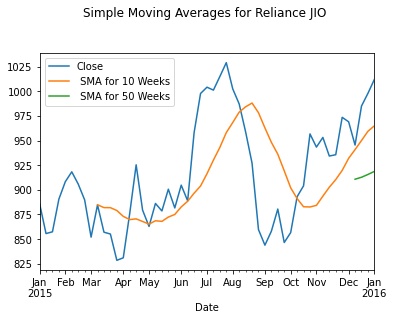

In [ ]:
plot_ts(jio,weeks=[10,50])

Moving Avg.s : for 10 weeks: 

 Date
2015-01-04    364.512500
2015-01-11    356.378571
2015-01-18    345.564286
2015-01-25    370.950000
2015-02-01    378.400000
2015-02-08    367.035714
2015-02-15    355.150000
2015-02-22    354.207143
2015-03-01    350.714286
2015-03-08    348.735714
2015-03-15    385.642857
2015-03-22    382.842857
2015-03-29    385.892857
2015-04-05    399.171429
2015-04-12    409.678571
2015-04-19    414.628571
2015-04-26    399.614286
2015-05-03    386.214286
2015-05-10    393.950000
2015-05-17    390.328571
2015-05-24    396.735714
2015-05-31    412.714286
2015-06-07    416.942857
2015-06-14    412.642857
2015-06-21    425.528571
2015-06-28    422.900000
2015-07-05    428.121429
2015-07-12    426.721429
2015-07-19    424.450000
2015-07-26    435.528571
2015-08-02    416.992857
2015-08-09    414.214286
2015-08-16    397.692857
2015-08-23    378.135714
2015-08-30    352.950000
2015-09-06    348.528571
2015-09-13    349.414286
2015-09-20    356.407143
2015-09-27   

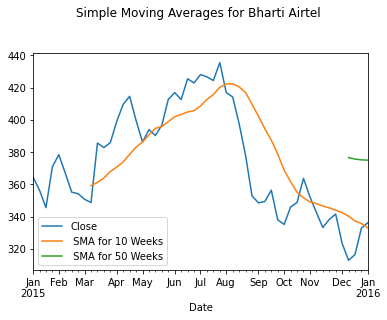

In [ ]:
plot_ts(airtel,weeks=[10,50])

Moving Avg.s : for 10 weeks: 

 Date
2015-01-04    6846.362500
2015-01-11    6751.950000
2015-01-18    6889.350000
2015-01-25    7115.000000
2015-02-01    7199.742857
2015-02-08    7083.442857
2015-02-15    7078.692857
2015-02-22    7207.085714
2015-03-01    7172.150000
2015-03-08    7305.485714
2015-03-15    7134.585714
2015-03-22    7078.771429
2015-03-29    6905.835714
2015-04-05    7035.585714
2015-04-12    7205.271429
2015-04-19    7180.214286
2015-04-26    6886.578571
2015-05-03    6756.978571
2015-05-10    6748.050000
2015-05-17    6798.100000
2015-05-24    6942.435714
2015-05-31    6919.164286
2015-06-07    6752.457143
2015-06-14    6605.164286
2015-06-21    6715.800000
2015-06-28    6904.864286
2015-07-05    6958.378571
2015-07-12    6965.164286
2015-07-19    7097.628571
2015-07-26    7103.207143
2015-08-02    7029.050000
2015-08-09    7172.157143
2015-08-16    7079.885714
2015-08-23    7032.985714
2015-08-30    6616.807143
2015-09-06    6498.635714
2015-09-13    6470.264286
2

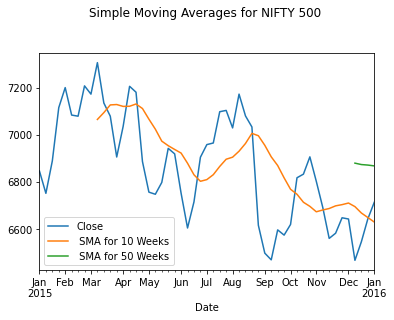

In [ ]:
plot_ts(nifty500,weeks=[10,50])

In [ ]:
SMA_close2 = pd.Series((jio['Close']).rolling(window=10).mean(),name = 'SMA_Close')
jio2 = pd.DataFrame(SMA_close2,jio['Close'])
jio2.head()

,SMA_Close
Close,
887.90,NaN
885.55,NaN
885.55,NaN
885.55,NaN
875.85,NaN


In [ ]:
SMA_close_a2 = pd.Series((airtel['Close']).rolling(window=10).mean(),name = 'SMA_Close_a')
airtel2 = pd.DataFrame(SMA_close_a2,airtel['Close'])
airtel2.head()

,SMA_Close_a
Close,
362.90,NaN
365.05,NaN
365.05,NaN
365.05,NaN
356.95,NaN


In [ ]:
SMA_close_n2 = pd.Series((nifty500['Close']).rolling(window=10).mean(),name = 'SMA_Close_n')
nifty2 = pd.DataFrame(SMA_close_n2,nifty500['Close'])
nifty2.head()

,SMA_Close_n
Close,
6786.10,NaN
6866.45,NaN
6866.45,NaN
6866.45,NaN
6857.45,NaN


In [ ]:
airtel2.isna().sum()

SMA_Close_a    366
dtype: int64

In [ ]:
nifty2.isna().sum()

SMA_Close_n    366
dtype: int64

In [ ]:
jio2.dropna(inplace=True)
airtel2.dropna(inplace=True)
nifty2.dropna(inplace=True)
jio2.isna().sum()

SMA_Close    0
dtype: int64

**Conclusion:** From the above graph plots, we can observe that as the rolling window becomes smaller, the moving average is changed significantly and comes closer to the actual raw data that is being used.

## Creating Dummy time Series

**Volume Shocks:**

In [ ]:
def vol_shocks(df):
    """
    0/1 dummy-coded boolean time series for shock, based on whether volume traded is 10% higher/lower than previous day
    """
    df["vol_t+1"] = df.Volume.shift(1)  #next rows value
    df["vol_shock"] = ((abs(df["vol_t+1"] - df["Volume"])/df["Volume"]*100)  > 10).astype(int)
    
    return df

In [ ]:
vol_shocks(jio)
vol_shocks(airtel)
vol_shocks(nifty500)

,Date,Open,High,Low,Close,Volume,Turnover,Year,Month,Day,WeekOfYear,vol_t+1,vol_shock
Date,,,,,,,,,,,,,
2015-01-01,2015-01-01,6767.60,6794.25,6755.00,6786.10,440905954,7.133120e+10,2015,1,1,1,NaN,0
2015-01-02,2015-01-02,6792.40,6883.05,6792.40,6866.45,617743719,1.216331e+11,2015,1,2,1,440905954.0,1
2015-01-03,2015-01-02,6792.40,6883.05,6792.40,6866.45,617743719,1.216331e+11,2015,1,2,1,617743719.0,0
2015-01-04,2015-01-02,6792.40,6883.05,6792.40,6866.45,617743719,1.216331e+11,2015,1,2,1,617743719.0,0
2015-01-05,2015-01-05,6877.35,6913.25,6848.25,6857.45,614330577,1.231650e+11,2015,1,5,2,617743719.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-28,2015-12-28,6663.45,6707.25,6663.45,6700.70,537406257,1.120892e+11,2015,12,28,53,563750645.0,0
2015-12-29,2015-12-29,6707.65,6717.25,6685.45,6705.25,619767104,1.147876e+11,2015,12,29,53,537406257.0,1
2015-12-30,2015-12-30,6715.80,6718.30,6681.00,6685.45,583010604,1.071623e+11,2015,12,30,53,619767104.0,0


**Price shocks**

In [ ]:

def price_shocks(df):
    """
    0/1 dummy-coded boolean time series for shock, based on whether closing price at T vs T+1 has a difference > 2%.
    0/1 dummy-coded boolean time series for shock, based on whether closing price at T vs T+1 has a difference > 5%
    
    """
    df["close_price_nd"] = df.Close.shift(1)  #next rows value
    
    df["price_shock"] = (abs((df["close_price_nd"] - df["Close"])/df["Close"]*100)  > 2).astype(int)
    
    df["price_black_swan"] =(abs((df["close_price_nd"] - df["Close"])/df["Close"]*100)  > 5).astype(int) 
    
    return df


In [ ]:
price_shocks(jio)
price_shocks(airtel)
price_shocks(nifty500)

,Date,Open,High,Low,Close,Volume,Turnover,Year,Month,Day,WeekOfYear,vol_t+1,vol_shock,close_price_nd,price_shock,price_black_swan
Date,,,,,,,,,,,,,,,,
2015-01-01,2015-01-01,6767.60,6794.25,6755.00,6786.10,440905954,7.133120e+10,2015,1,1,1,NaN,0,NaN,0,0
2015-01-02,2015-01-02,6792.40,6883.05,6792.40,6866.45,617743719,1.216331e+11,2015,1,2,1,440905954.0,1,6786.10,0,0
2015-01-03,2015-01-02,6792.40,6883.05,6792.40,6866.45,617743719,1.216331e+11,2015,1,2,1,617743719.0,0,6866.45,0,0
2015-01-04,2015-01-02,6792.40,6883.05,6792.40,6866.45,617743719,1.216331e+11,2015,1,2,1,617743719.0,0,6866.45,0,0
2015-01-05,2015-01-05,6877.35,6913.25,6848.25,6857.45,614330577,1.231650e+11,2015,1,5,2,617743719.0,0,6866.45,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-28,2015-12-28,6663.45,6707.25,6663.45,6700.70,537406257,1.120892e+11,2015,12,28,53,563750645.0,0,6656.75,0,0
2015-12-29,2015-12-29,6707.65,6717.25,6685.45,6705.25,619767104,1.147876e+11,2015,12,29,53,537406257.0,1,6700.70,0,0
2015-12-30,2015-12-30,6715.80,6718.30,6681.00,6685.45,583010604,1.071623e+11,2015,12,30,53,619767104.0,0,6705.25,0,0


**Volume shock direction:**

In [ ]:
def dir_f(df): 
    # 0 - negative and 1- positive
    if df["vol_shock"] == 0:
        pass
    else:
        if (df["vol_t+1"] - df["Volume"]) < 0:
            return 0
        else:
            return 1
def vol_shock_dir(df):
    df['VOL_SHOCK_DIR'] = 'Nan'
    df['VOL_SHOCK_DIR'] = df.apply(dir_f, axis=1)
    return df            

In [ ]:
vol_shock_dir(jio)
vol_shock_dir(airtel)
vol_shock_dir(nifty500)

,Date,Open,High,Low,Close,Volume,Turnover,Year,Month,Day,WeekOfYear,vol_t+1,vol_shock,close_price_nd,price_shock,price_black_swan,VOL_SHOCK_DIR
Date,,,,,,,,,,,,,,,,,
2015-01-01,2015-01-01,6767.60,6794.25,6755.00,6786.10,440905954,7.133120e+10,2015,1,1,1,NaN,0,NaN,0,0,NaN
2015-01-02,2015-01-02,6792.40,6883.05,6792.40,6866.45,617743719,1.216331e+11,2015,1,2,1,440905954.0,1,6786.10,0,0,0.0
2015-01-03,2015-01-02,6792.40,6883.05,6792.40,6866.45,617743719,1.216331e+11,2015,1,2,1,617743719.0,0,6866.45,0,0,NaN
2015-01-04,2015-01-02,6792.40,6883.05,6792.40,6866.45,617743719,1.216331e+11,2015,1,2,1,617743719.0,0,6866.45,0,0,NaN
2015-01-05,2015-01-05,6877.35,6913.25,6848.25,6857.45,614330577,1.231650e+11,2015,1,5,2,617743719.0,0,6866.45,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-28,2015-12-28,6663.45,6707.25,6663.45,6700.70,537406257,1.120892e+11,2015,12,28,53,563750645.0,0,6656.75,0,0,NaN
2015-12-29,2015-12-29,6707.65,6717.25,6685.45,6705.25,619767104,1.147876e+11,2015,12,29,53,537406257.0,1,6700.70,0,0,0.0
2015-12-30,2015-12-30,6715.80,6718.30,6681.00,6685.45,583010604,1.071623e+11,2015,12,30,53,619767104.0,0,6705.25,0,0,NaN


**Price shock direction:**

In [ ]:
def dir_f_price(df):
    
    # considerng only shock - 1 valued rows.
    # 0 - negative and 1- positive
    if df["price_shock"] == 0:
        pass
    else:
        if (df["close_price_nd"] - df["Close"]) < 0:
            return 0
        else:
            return 1
def price_shock_direction(df):
    df['PRICE_SHOCK_DIR'] = 'Nan'
    df['PRICE_SHOCK_DIR'] = df.apply(dir_f_price, axis=1)
    return df

In [ ]:
price_shock_direction(jio)
price_shock_direction(airtel)
price_shock_direction(nifty500)

,Date,Open,High,Low,Close,Volume,Turnover,Year,Month,Day,WeekOfYear,vol_t+1,vol_shock,close_price_nd,price_shock,price_black_swan,VOL_SHOCK_DIR,PRICE_SHOCK_DIR
Date,,,,,,,,,,,,,,,,,,
2015-01-01,2015-01-01,6767.60,6794.25,6755.00,6786.10,440905954,7.133120e+10,2015,1,1,1,NaN,0,NaN,0,0,NaN,NaN
2015-01-02,2015-01-02,6792.40,6883.05,6792.40,6866.45,617743719,1.216331e+11,2015,1,2,1,440905954.0,1,6786.10,0,0,0.0,NaN
2015-01-03,2015-01-02,6792.40,6883.05,6792.40,6866.45,617743719,1.216331e+11,2015,1,2,1,617743719.0,0,6866.45,0,0,NaN,NaN
2015-01-04,2015-01-02,6792.40,6883.05,6792.40,6866.45,617743719,1.216331e+11,2015,1,2,1,617743719.0,0,6866.45,0,0,NaN,NaN
2015-01-05,2015-01-05,6877.35,6913.25,6848.25,6857.45,614330577,1.231650e+11,2015,1,5,2,617743719.0,0,6866.45,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-28,2015-12-28,6663.45,6707.25,6663.45,6700.70,537406257,1.120892e+11,2015,12,28,53,563750645.0,0,6656.75,0,0,NaN,NaN
2015-12-29,2015-12-29,6707.65,6717.25,6685.45,6705.25,619767104,1.147876e+11,2015,12,29,53,537406257.0,1,6700.70,0,0,0.0,NaN
2015-12-30,2015-12-30,6715.80,6718.30,6681.00,6685.45,583010604,1.071623e+11,2015,12,30,53,619767104.0,0,6705.25,0,0,NaN,NaN


Price shock without Volume shocks:

In [ ]:
def price_shock_w_vol_shock(df):
    
    df["n_vol_shock"]  = (~(df["vol_shock"].astype(bool))).astype(int)
    df["price_shock_w_vol_shock"] = df["n_vol_shock"] & df["price_shock"]
    
    return df

In [ ]:
price_shock_w_vol_shock(jio)
price_shock_w_vol_shock(airtel)
price_shock_w_vol_shock(nifty500)

,Date,Open,High,Low,Close,Volume,Turnover,Year,Month,Day,WeekOfYear,vol_t+1,vol_shock,close_price_nd,price_shock,price_black_swan,VOL_SHOCK_DIR,PRICE_SHOCK_DIR,n_vol_shock,price_shock_w_vol_shock
Date,,,,,,,,,,,,,,,,,,,,
2015-01-01,2015-01-01,6767.60,6794.25,6755.00,6786.10,440905954,7.133120e+10,2015,1,1,1,NaN,0,NaN,0,0,NaN,NaN,1,0
2015-01-02,2015-01-02,6792.40,6883.05,6792.40,6866.45,617743719,1.216331e+11,2015,1,2,1,440905954.0,1,6786.10,0,0,0.0,NaN,0,0
2015-01-03,2015-01-02,6792.40,6883.05,6792.40,6866.45,617743719,1.216331e+11,2015,1,2,1,617743719.0,0,6866.45,0,0,NaN,NaN,1,0
2015-01-04,2015-01-02,6792.40,6883.05,6792.40,6866.45,617743719,1.216331e+11,2015,1,2,1,617743719.0,0,6866.45,0,0,NaN,NaN,1,0
2015-01-05,2015-01-05,6877.35,6913.25,6848.25,6857.45,614330577,1.231650e+11,2015,1,5,2,617743719.0,0,6866.45,0,0,NaN,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-28,2015-12-28,6663.45,6707.25,6663.45,6700.70,537406257,1.120892e+11,2015,12,28,53,563750645.0,0,6656.75,0,0,NaN,NaN,1,0
2015-12-29,2015-12-29,6707.65,6717.25,6685.45,6705.25,619767104,1.147876e+11,2015,12,29,53,537406257.0,1,6700.70,0,0,0.0,NaN,0,0
2015-12-30,2015-12-30,6715.80,6718.30,6681.00,6685.45,583010604,1.071623e+11,2015,12,30,53,619767104.0,0,6705.25,0,0,NaN,NaN,1,0


#**PART 2 : VISUALIZATION USING ALTAIR**

In [ ]:
! pip install vega

     |████████████████████████████████| 1.3MB 2.7MB/s 


In [ ]:
#import
import altair as alt
from altair import *

In [ ]:
alt.renderers.enable('html')

RendererRegistry.enable('html')

In [ ]:
nifty500.head(3)

,Date,Open,High,Low,Close,Volume,Turnover,Year,Month,Day,WeekOfYear,vol_t+1,vol_shock,close_price_nd,price_shock,price_black_swan,VOL_SHOCK_DIR,PRICE_SHOCK_DIR,n_vol_shock,price_shock_w_vol_shock
Date,,,,,,,,,,,,,,,,,,,,
2015-01-01,2015-01-01,6767.6,6794.25,6755.0,6786.10,440905954,7.133120e+10,2015,1,1,1,NaN,0,NaN,0,0,NaN,NaN,1,0
2015-01-02,2015-01-02,6792.4,6883.05,6792.4,6866.45,617743719,1.216331e+11,2015,1,2,1,440905954.0,1,6786.10,0,0,0.0,NaN,0,0
2015-01-03,2015-01-02,6792.4,6883.05,6792.4,6866.45,617743719,1.216331e+11,2015,1,2,1,617743719.0,0,6866.45,0,0,NaN,NaN,1,0


In [ ]:
data=jio
data2=airtel
data3=nifty500
print(type(data))
data.head(10)

<class 'pandas.core.frame.DataFrame'>


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Year,Month,Day,WeekOfYear,vol_t+1,vol_shock,close_price_nd,price_shock,price_black_swan,VOL_SHOCK_DIR,PRICE_SHOCK_DIR,n_vol_shock,price_shock_w_vol_shock
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01,2015-01-01,RELIANCE,EQ,891.15,886.3,892.00,883.65,888.00,887.90,887.62,677439,6.013059e+13,16263,286377,0.4227,2015,1,1,1,NaN,0,NaN,0,0,NaN,NaN,1,0
2015-01-02,2015-01-02,RELIANCE,EQ,887.90,888.1,896.05,884.30,884.95,885.55,889.39,1675827,1.490461e+14,31269,1048543,0.6257,2015,1,2,1,677439.0,1,887.90,0,0,0.0,NaN,0,0
2015-01-03,2015-01-02,RELIANCE,EQ,887.90,888.1,896.05,884.30,884.95,885.55,889.39,1675827,1.490461e+14,31269,1048543,0.6257,2015,1,2,1,1675827.0,0,885.55,0,0,NaN,NaN,1,0
2015-01-04,2015-01-02,RELIANCE,EQ,887.90,888.1,896.05,884.30,884.95,885.55,889.39,1675827,1.490461e+14,31269,1048543,0.6257,2015,1,2,1,1675827.0,0,885.55,0,0,NaN,NaN,1,0
2015-01-05,2015-01-05,RELIANCE,EQ,885.55,885.0,890.90,874.10,875.55,875.85,881.88,2309591,2.036781e+14,67035,1393132,0.6032,2015,1,5,2,1675827.0,1,885.55,0,0,0.0,NaN,0,0
2015-01-06,2015-01-06,RELIANCE,EQ,875.85,870.0,873.00,832.00,832.50,836.10,847.60,4258043,3.609133e+14,120767,2353273,0.5527,2015,1,6,2,2309591.0,1,875.85,1,0,0.0,1.0,0,0
2015-01-07,2015-01-07,RELIANCE,EQ,836.10,837.1,858.80,837.00,858.00,854.30,849.81,4736315,4.024972e+14,125939,2885468,0.6092,2015,1,7,2,4258043.0,1,836.10,1,0,0.0,0.0,0,0
2015-01-08,2015-01-08,RELIANCE,EQ,854.30,860.1,862.90,840.15,843.00,842.05,845.70,4542457,3.841574e+14,77800,2663830,0.5864,2015,1,8,2,4736315.0,0,854.30,0,0,NaN,NaN,1,0
2015-01-09,2015-01-09,RELIANCE,EQ,842.05,848.4,862.00,845.00,861.50,860.30,852.15,3061366,2.608741e+14,56795,1697823,0.5546,2015,1,9,2,4542457.0,1,842.05,1,0,1.0,0.0,0,0


In [ ]:
SMA_jio = pd.Series((jio['Close']).rolling(window=10).mean(),name = 'SMA_j')
print(type(SMA_jio))
ma1=pd.DataFrame(SMA_jio,jio['Date'])
print(type(ma1))
ma1.head(2)

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


,SMA_j
Date,
2015-01-01,NaN
2015-01-02,NaN


In [ ]:

plot_jio=alt.Chart(data).mark_line().encode(
    x='Date',
    y='Close',
    color='Symbol'
).interactive()
sma1 = alt.Chart(data).mark_point(
    color='violet',
    size=3
).transform_window(
    sma='mean(Close)',
    frame=[-25, 25]
).encode(
    x='Date',
    y='sma:Q'
)

(plot_jio + sma1).properties(width=1000,height=300)


alt.LayerChart(...)

In [ ]:
vol_s=alt.Chart(data).mark_point(color='red').encode(
    x='Date',
    y='vol_shock'
).interactive()
points = alt.Chart(data).mark_point(color='green',size=5).encode(
    x='Date',
    y='price_shock_w_vol_shock',
    color='Symbol'

).interactive()
(points+vol_s).properties(width=1000,height=300)

alt.LayerChart(...)

In [ ]:
plot_airtel=alt.Chart(data2).mark_line().encode(
    x='Date',
    y='Close',
    color='Symbol'
).interactive()
sma12 = alt.Chart(data2).mark_point(
    color='violet',
    size=3
).transform_window(
    sma='mean(Close)',
    frame=[-25, 25]
).encode(
    x='Date',
    y='sma:Q'
)

(plot_airtel + sma12).properties(width=500,height=300)



alt.LayerChart(...)

In [ ]:
vol_s2=alt.Chart(data2).mark_circle(color='red').encode(
    x='Date',
    y='vol_shock'
).interactive()
points2 = alt.Chart(data2).mark_circle().encode(
    x='Date',
    y='price_shock_w_vol_shock',
    color='Symbol'

).interactive()
(points2+vol_s2).properties(width=1000)

alt.LayerChart(...)

In [ ]:
plot_nifty=alt.Chart(data3).mark_line().encode(
    x='Date',
    y='Close'
).interactive()
sma13 = alt.Chart(data3).mark_point(
    color='violet',
    size=3
).transform_window(
    sma3='mean(Close)',
    frame=[-25, 25]
).encode(
    x='Date',
    y='sma3:Q'
)


(plot_nifty + sma13).properties(width=1000,height=300)


alt.LayerChart(...)

In [ ]:
vol_s3=alt.Chart(data3).mark_point(color='red').encode(
    x='Date',
    y='vol_shock'
).interactive()
points3 = alt.Chart(data3).mark_point(color='green').encode(
    x='Date',
    y='price_shock_w_vol_shock'

).interactive()
(points3 + vol_s3 ).properties(width=1000,height=300)

alt.LayerChart(...)

In [ ]:
from statsmodels.tsa.stattools import acf, pacf

def draw_pacf(stock):
    
    lags = 50

    x = list(range(lags))
    partial_autocorr = pacf(stock["Close"], nlags=lags)
    d=pd.DataFrame([x,partial_autocorr])


    p = alt.Chart(d).mark_point().encode(
    x='x',
    y='partal_autocorr',
    color='Symbol'
    ).interactive()
    return p

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Partial autocorrelation plot:

In [ ]:
lags = 50
pac = pacf(jio["Close"], nlags=lags)
x = np.array(list(range(0,lags+1)))
p = pd.DataFrame(data={'x':x,'partial_autocorr':pac})
pac_jio = alt.Chart(p).mark_bar(size=2).encode(
    x="x",
    y="partial_autocorr",
    color=alt.condition(
        alt.datum.nonfarm_change > 0,
        alt.value("steelblue"),  # The positive color
        alt.value("orange")  # The negative color
    )
  ).properties(width=600,height=400).interactive()
dot_j=alt.Chart(p).mark_point().encode(
    x="x",
    y="partial_autocorr"
  ).properties(width=600,height=400)

pac_jio+dot_j


alt.LayerChart(...)

In [ ]:
lags = 50
pac_a = pacf(airtel["Close"], nlags=lags)
xa = np.array(list(range(0,lags+1)))
p_a = pd.DataFrame(data={'x':xa,'partial_autocorr':pac_a})
pac_airtel = alt.Chart(p_a).mark_bar(size=2).encode(
    x="x",
    y="partial_autocorr",
    color=alt.condition(
        alt.datum.nonfarm_change > 0,
        alt.value("steelblue"),  # The positive color
        alt.value("orange")  # The negative color
    )
  ).properties(width=600,height=400).interactive()
dot_a=alt.Chart(p_a).mark_point().encode(
    x="x",
    y="partial_autocorr"
  ).properties(width=600,height=400)

pac_airtel+dot_a

alt.LayerChart(...)

In [ ]:
lags = 50
pac_n = pacf(nifty500["Close"], nlags=lags)
xn = np.array(list(range(0,lags+1)))
p_n = pd.DataFrame(data={'x':xn,'PACF for NIFTY 500':pac_n})
pac_nifty = alt.Chart(p_n).mark_bar(size=2).encode(
    x="x",
    y="PACF for NIFTY 500",
    color=alt.condition(
        alt.datum.nonfarm_change > 0,
        alt.value("steelblue"),  # The positive color
        alt.value("orange")  # The negative color
    )
  ).properties(width=600,height=400).interactive()
dot_n=alt.Chart(p_n).mark_point().encode(
    x="x",
    y="PACF for NIFTY 500"
  ).properties(width=600,height=400)

pac_nifty+dot_n

alt.LayerChart(...)

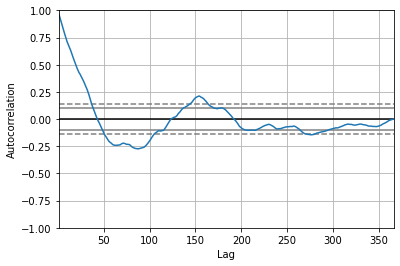

In [ ]:
from pandas.plotting import autocorrelation_plot as ap
ap(jio['Close'])

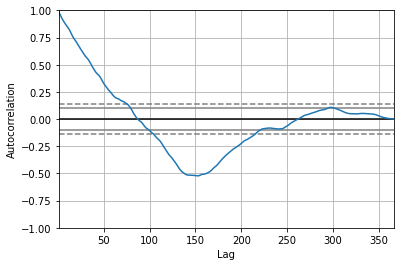

In [ ]:
ap(airtel['Close'])

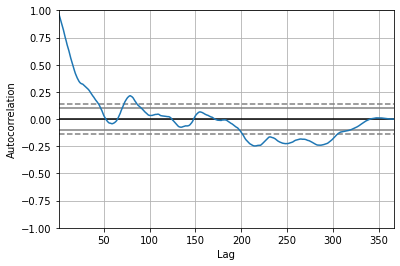

In [ ]:
ap(nifty500['Close'])

**PART 3 : Machine Learning**

In [ ]:
from pandas import read_csv, set_option
from pandas import Series, datetime
from pandas.plotting import scatter_matrix, autocorrelation_plot
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, TimeSeriesSplit
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error,mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import random
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf,pacf
from xgboost import XGBRegressor,XGBClassifier
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
TCS = pd.read_csv('tcs.csv', parse_dates=['Date'])
INFY = pd.read_csv('infy.csv', parse_dates=['Date'])
stock_set = [TCS, INFY]
TCS.name = 'TCS'
INFY.name = 'INFY'

In [ ]:
TCS["Date"] = pd.to_datetime(TCS["Date"])
INFY["Date"] = pd.to_datetime(INFY["Date"])

In [ ]:
def datetime_tick(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df['Date'].dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = df.Date.dt.weekofyear
    
    
    
for i in range(len(stock_set)):
    datetime_tick(stock_set[i])

In [ ]:
TCS.head(5)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Year,Month,Day,WeekOfYear
0,2015-01-01,TCS,EQ,2558.25,2567.0,2567.00,2541.00,2550.00,2545.55,2548.51,183415,4.674345e+13,8002,52870,0.2883,2015,1,1,1
1,2015-01-02,TCS,EQ,2545.55,2551.0,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+14,27585,309350,0.6683,2015,1,2,1
2,2015-01-05,TCS,EQ,2579.45,2581.0,2599.90,2524.65,2538.10,2540.25,2563.94,877121,2.248886e+14,43234,456728,0.5207,2015,1,5,2
3,2015-01-06,TCS,EQ,2540.25,2529.1,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,2.989615e+14,84503,714306,0.5894,2015,1,6,2
4,2015-01-07,TCS,EQ,2446.60,2470.0,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,3.208362e+14,101741,886368,0.6724,2015,1,7,2


In [ ]:
INFY.head(5)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Year,Month,Day,WeekOfYear
0,2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154,2015,1,1,1
1,2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371,2015,1,2,1
2,2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370,2015,1,5,2
3,2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332,2015,1,6,2
4,2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270,2015,1,7,2


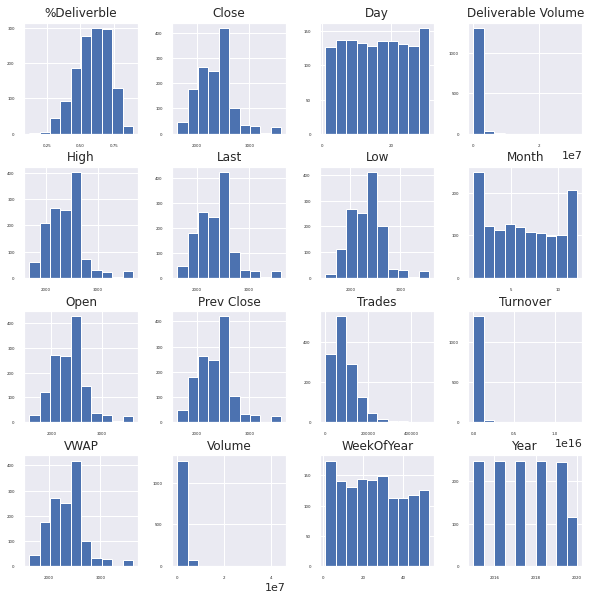

In [ ]:
# Plot a histogram for all the columns of the dataframe. This shows the frequency of values in all the columns
sns.set()
TCS.hist(sharex = False, sharey = False, xlabelsize = 4, ylabelsize = 4, figsize=(10, 10))
plt.show()

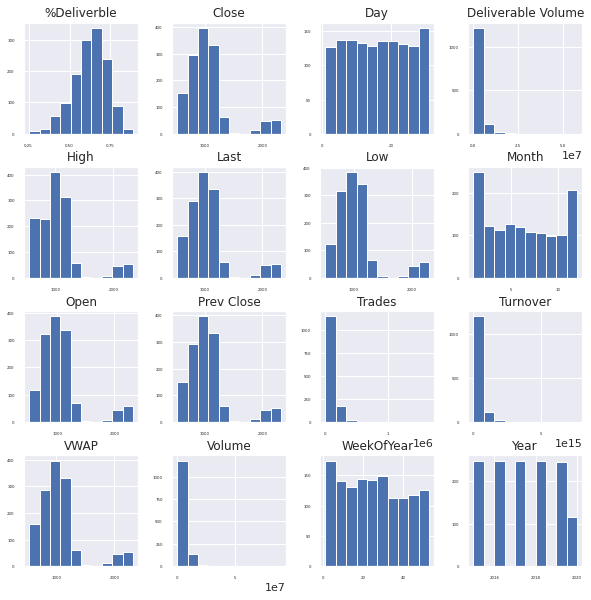

In [ ]:
# Plot a histogram for all the columns of the dataframe. This shows the frequency of values in all the columns
sns.set()
INFY.hist(sharex = False, sharey = False, xlabelsize = 4, ylabelsize = 4, figsize=(10, 10))
plt.show()

#Assumption of No Multicollinearity : 
The heatmaps used below can be used to remove multicollinearity by removing those variables which are least correlated and by using those which are most correlated with the variable that is required for prediction i.e the closing price in this case.

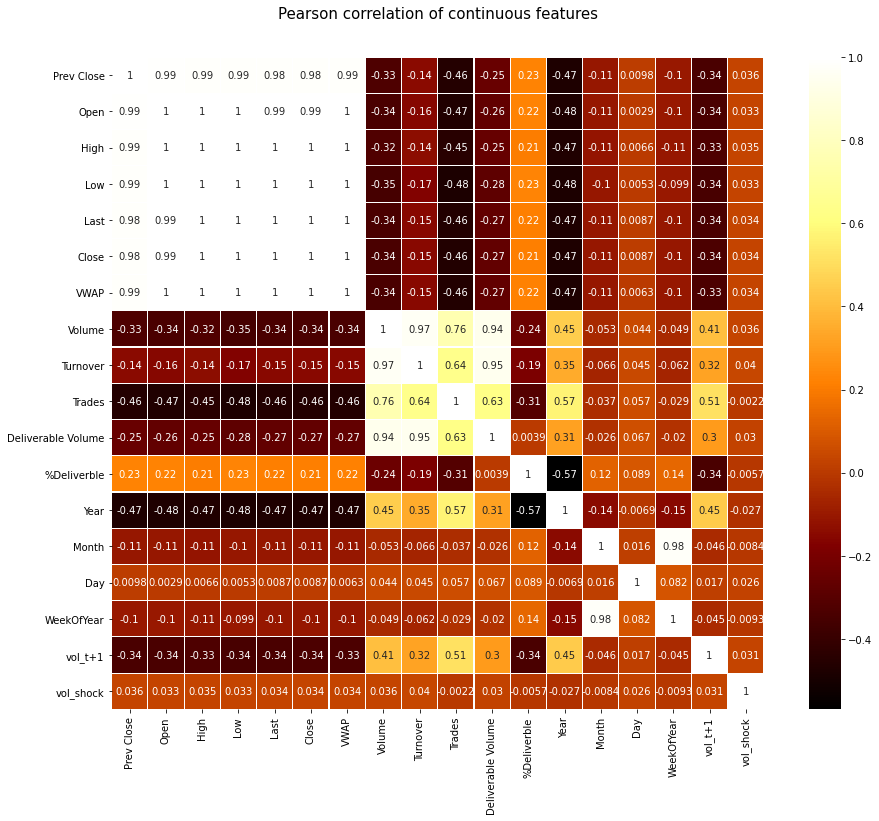

In [ ]:
colormap = plt.cm.afmhot
plt.figure(figsize=(16,12))
plt.title('Pearson correlation of continuous features', y=1.05, size=15)
sns.heatmap(TCS.corr(),linewidths=0.1,vmax=1.0, square=True, 
            cmap=colormap, linecolor='white', annot=True)
plt.show()#heat map for TCS dataset

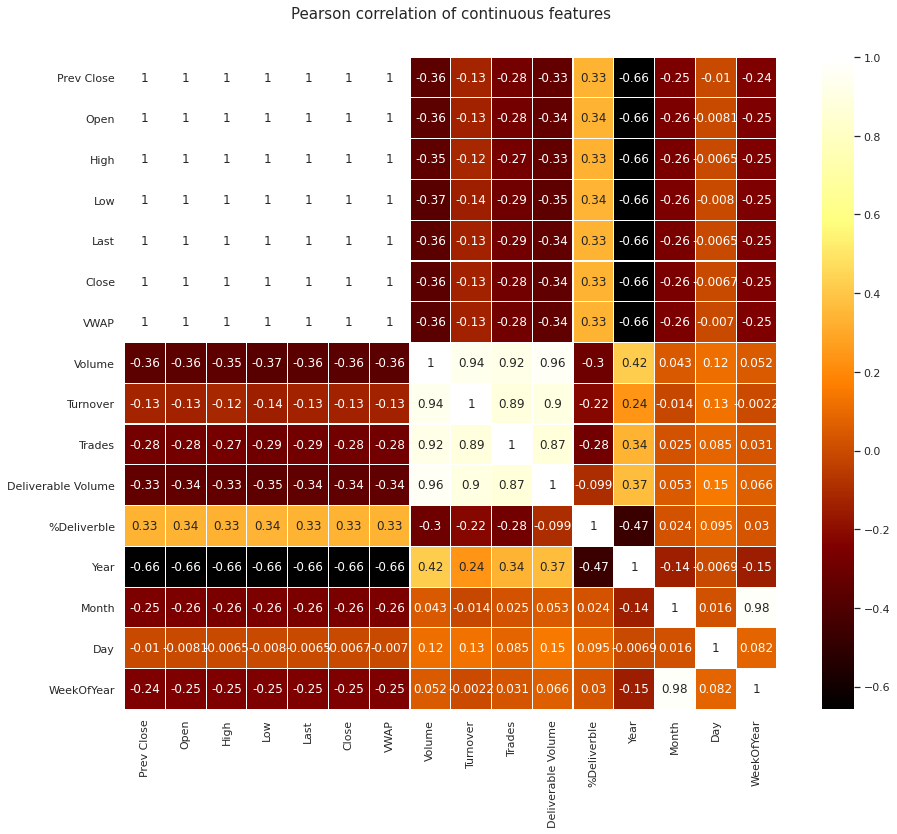

In [ ]:
colormap = plt.cm.afmhot
plt.figure(figsize=(16,12))
plt.title('Pearson correlation of continuous features', y=1.05, size=15)
sns.heatmap(INFY.corr(),linewidths=0.1,vmax=1.0, square=True, 
            cmap=colormap, linecolor='white', annot=True)
plt.show()#heat map for INFY dataset

TCS Dataset :

In [ ]:
INFY.dropna(inplace=True)
INFY.isna().sum()
TCS.isna().sum()

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
Year                  0
Month                 0
Day                   0
WeekOfYear            0
dtype: int64

In [ ]:
# Print the datatypes and count of the dataframe
print(TCS.dtypes)
print(TCS.count())

# Recheck the count
print(TCS.count())
# Separate the dataframe for input(X) and output variables(y)
X = TCS.loc[:,'Prev Close':'Last']
y = TCS.loc[:,'Close']
# Set the validation size, i.e the test set to 20%
validation_size = 0.20
# Split the dataset to test and train sets
# Split the initial 70% of the data as training set and the remaining 30% data as the testing set
train_size = int(len(X.index) * 0.7)
print(len(y))
print(train_size)
X_train, X_test = X.loc[0:train_size, :], X.loc[train_size: len(X.index), :]
y_train, y_test = y[0:train_size+1], y.loc[train_size: len(X.index)]
print('Observations: %d' % (len(X.index)))
print('X Training Observations: %d' % (len(X_train.index)))
print('X Testing Observations: %d' % (len(X_test.index)))
print('y Training Observations: %d' % (len(y_train)))
print('y Testing Observations: %d' % (len(y_test)))
num_folds = 10
scoring = 'accuracy'

Date                  datetime64[ns]
Symbol                        object
Series                        object
Prev Close                   float64
Open                         float64
High                         float64
Low                          float64
Last                         float64
Close                        float64
VWAP                         float64
Volume                         int64
Turnover                     float64
Trades                         int64
Deliverable Volume             int64
%Deliverble                  float64
Year                           int64
Month                          int64
Day                            int64
WeekOfYear                     int64
dtype: object
Date                  1350
Symbol                1350
Series                1350
Prev Close            1350
Open                  1350
High                  1350
Low                   1350
Last                  1350
Close                 1350
VWAP                  1350
Volume       

INFY Dataset:-

In [ ]:
# Print the datatypes and count of the dataframe
print(INFY.dtypes)
print(INFY.count())

# Recheck the count
print(INFY.count())
# Separate the dataframe for input(X) and output variables(y)
X1 = INFY.loc[:,'Prev Close':'Last']
y1 = INFY.loc[:,'Close']
# Set the validation size, i.e the test set to 20%
validation_size = 0.20
# Split the dataset to test and train sets
# Split the initial 70% of the data as training set and the remaining 30% data as the testing set
train_size = int(len(X.index) * 0.7)
print(len(y1))
print(train_size)
X_train1, X_test1 = X1.loc[0:train_size, :], X1.loc[train_size: len(X1.index), :]
y_train1, y_test1 = y1[0:train_size+1], y1.loc[train_size: len(X1.index)]

from sklearn.model_selection import KFold  

#kf = KFold(n_splits=3,shuffle=True)
#kf.get_n_splits(X1)

#print(kf)  

#(n_splits=3, random_state=None, shuffle=True)
#for train_index, test_index in kf.split(X1):
    #print("TRAIN:", train_index, "TEST:", test_index)
    #X_train1, X_test1 = X1[train_index], X1[test_index]
    #y_train1, y_test1 = y1[train_index], y1[test_index]
print('Observations: %d' % (len(X1.index)))
print('X Training Observations: %d' % (len(X_train1.index)))
print('X Testing Observations: %d' % (len(X_test1.index)))
print('y Training Observations: %d' % (len(y_train1)))
print('y Testing Observations: %d' % (len(y_test1)))

Date                  datetime64[ns]
Symbol                        object
Series                        object
Prev Close                   float64
Open                         float64
High                         float64
Low                          float64
Last                         float64
Close                        float64
VWAP                         float64
Volume                         int64
Turnover                     float64
Trades                         int64
Deliverable Volume             int64
%Deliverble                  float64
Year                           int64
Month                          int64
Day                            int64
WeekOfYear                     int64
vol_t+1                      float64
vol_shock                      int64
dtype: object
Date                  1350
Symbol                1350
Series                1350
Prev Close            1350
Open                  1350
High                  1350
Low                   1350
Last                

#The Assumption of Linearity:- 
The data and the model i.e. the XGBRegressor used in this model are both non-linear in nature.

**Scaling the inputs and training the dataset:-**

In [ ]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model_xgb = XGBRegressor()
model_xgb.fit(rescaledX, y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_test)
predictions = model_xgb.predict(rescaledValidationX)
print("MAE:")
print(mean_absolute_error(y_test, predictions))#for TCS dataset


[09:05:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE:
10.382823684767548


error for this model : 10.38

In [ ]:
scaler = StandardScaler().fit(X_train1)
rescaledX1 = scaler.transform(X_train1)
model_xgb1 = XGBRegressor()
model_xgb1.fit(rescaledX1, y_train1)
# estimate accuracy on validation dataset
rescaledValidationX1 = scaler.transform(X_test1)
predictions1 = model_xgb1.predict(rescaledValidationX1)
print("MAE:")
print(mean_absolute_error(y_test1, predictions1))#for INFY dataset

[10:42:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE:
15.618145992485756


error for this model : 15.61

#The Assumption of Normality of Errors:
In this model the error function that we have used is Mean Absolute Error which is a linear function and can be considered to be normalised and the error terms here are IID (Independent and Identically Distributed).

**Hyperparameter tuning:**

Hand tuning the hyperparameters:


In [ ]:
# XGBoost on Stock Price dataset, Tune n_estimators and max_depth
#hand tuning the hyperparameters
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import matplotlib
#for TCS
matplotlib.use('Agg')
model = XGBRegressor()
n_estimators = [150, 200, 250, 450, 500, 550, 1000]
max_depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
print(max_depth)
best_depth = 0
best_estimator = 0
min_error = 10
for n in n_estimators:
    for md in max_depth:
        model = XGBRegressor(n_estimators=n, max_depth=md)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        error = mean_absolute_error(y_test, y_pred)
        if error < min_error:
            min_error = error
            best_depth = md
            best_estimator = n
        print("error is " + str(error) + " at depth of " + str(md) + " and estimator " + str(n))
print("Minimum Absolute error is " + str(min_error) + " at depth of " + str(best_depth) + " and estimator of " + str(best_estimator))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[18:42:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
error is 12.301406694985383 at depth of 1 and estimator 150
[18:42:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
error is 11.322903036483993 at depth of 2 and estimator 150
[18:42:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
error is 10.134717638739222 at depth of 3 and estimator 150
[18:42:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
error is 10.02087071611376 at depth of 4 and estimator 150
[18:42:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
error is 9.882968425280945 at depth of 5 and estimator 150
[18:42:28] WARNING: /worksp

M.A.E after hand tuning the hyper parameters :9.41

In [ ]:
matplotlib.use('Agg')#for INFY
model2 = XGBRegressor()
n_estimators2 = [150, 200, 250, 450, 500, 550, 1000]
max_depth2 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
print(max_depth2)
best_depth2 = 0
best_estimator2 = 0
min_error2 = 16
for n in n_estimators2:
    for md in max_depth2:
        model2 = XGBRegressor(n_estimators=n, max_depth=md)
        model2.fit(X_train1, y_train1)
        y_pred2 = model2.predict(X_test1)
        error2 = mean_absolute_error(y_test1, y_pred2)
        if error2 < min_error2:
            min_error2 = error2
            best_depth2 = md
            best_estimator2= n
        print("error is " + str(error2) + " at depth of " + str(md) + " and estimator " + str(n))
print("Minimum Absolute error is " + str(min_error2) + " at depth of " + str(best_depth2) + " and estimator of " + str(best_estimator2))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[18:43:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
error is 16.71130319980565 at depth of 1 and estimator 150
[18:43:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
error is 14.508684972002 at depth of 2 and estimator 150
[18:43:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
error is 15.59276634178725 at depth of 3 and estimator 150
[18:43:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
error is 14.70580083536984 at depth of 4 and estimator 150
[18:43:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
error is 14.505331345731989 at depth of 5 and estimator 150
[18:43:03] WARNING: /workspace/

M.A.E after hand tuning the hyper parameters :14.12

#Tuning the hyperparameters using GridSearch CV:-
Assuming that some data is Independent and Identically Distributed (i.i.d.) is making the assumption that all samples stem from the same generative process and that the generative process is assumed to have no memory of past generated samples.

In [ ]:
# Various hyper-parameters to tune for TCS dataset
xgb1 = XGBRegressor()

parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [ 5, 6, 7, 8, 9, 10],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [200, 250, 450, 500, 550, 1000],
              'eval_metric':['mae']}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 3,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train, y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)
best_params=xgb_grid.best_params_

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   19.7s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.0min
[Parallel(n_jobs=5)]: Done 324 out of 324 | elapsed:  3.7min finished


0.8897968527751469
{'colsample_bytree': 0.7, 'eval_metric': 'mae', 'learning_rate': 0.03, 'max_depth': 10, 'min_child_weight': 4, 'n_estimators': 550, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


From the above hyperparameter tuning we get the best parameter as:
{'colsample_bytree': 0.7, 'eval_metric': 'mae', 'learning_rate': 0.03, 'max_depth': 10, 'min_child_weight': 4, 'n_estimators': 550, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}
with a score of 0.892375 .


In [ ]:
# Various hyper-parameters to tune for INFY dataset
xgb2 = XGBRegressor()

parameters2 = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [ 5, 6, 7, 8, 9, 10],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [200, 250, 450, 500, 550, 1000],
              'eval_metric':['mae']}

xgb_grid2 = GridSearchCV(xgb2,
                        parameters,
                        cv = 3,
                        n_jobs = 5,
                        verbose=True)

xgb_grid2.fit(X_train1, y_train1)

print(xgb_grid2.best_score_)
print(xgb_grid2.best_params_)
best_parameters = xgb_grid2.best_params_

Principle Component Analysis:-

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
pca2 = PCA(n_components=4)
pca.fit(X)
pca2.fit(X1)
transformed = pca.transform(X)#for TCS
transformed1 = pca2.transform(X1)#for INFY
transformed.shape
print(type(transformed))

<class 'numpy.ndarray'>


### Dumping the best parameters in the model to improve it's accuracy of prediction:-

In [ ]:
print(best_params)

{'colsample_bytree': 0.7, 'eval_metric': 'mae', 'learning_rate': 0.03, 'max_depth': 10, 'min_child_weight': 4, 'n_estimators': 550, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [ ]:
pca_df = pd.DataFrame(transformed)

X_train_pca, X_test_pca = pca_df.loc[0:train_size, :], pca_df.loc[train_size: len(X.index), :]

reg = XGBRegressor(colsample_bytree=0.7, learning_rate=0.03, max_depth= 10, min_child_weight=4, n_estimators= 550, nthread= 4, silent= 1)
reg.fit(X_train_pca, y_train)
reg2 = XGBRegressor(colsample_bytree=0.7, learning_rate=0.03, max_depth= 10, min_child_weight=4, n_estimators= 550, nthread= 4, silent= 1)
reg2.fit(X_train,y_train)
y_pred_pca = reg.predict(X_test_pca)
y_pred_ = reg2.predict(X_test)
error_pca = mean_absolute_error(y_test, y_pred_pca)
err = mean_absolute_error(y_test, y_pred_)

print("error using PCA is "+ str(error_pca))#for TCS
print("error without PCA is "+ str(err))

error using PCA is 14.610131354872223
error without PCA is 9.146573251808809


In [ ]:
print(best_parameters)

{'colsample_bytree': 0.7, 'eval_metric': 'mae', 'learning_rate': 0.07, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 450, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [ ]:
pca_df1 = pd.DataFrame(transformed1)

X_train_pca1, X_test_pca1 = pca_df1.loc[0:train_size, :], pca_df1.loc[train_size: len(X1.index), :]

reg1 = XGBRegressor(colsample_bytree=0.7, eval_metric='mae', learning_rate=0.07, max_depth=5, min_child_weight=4, n_estimators=450, nthread= 4, objective= 'reg:linear', silent= 1)
reg1.fit(X_train_pca1, y_train1)
y_pred_pca1 = reg1.predict(X_test_pca1)
error1 = mean_absolute_error(y_test1, y_pred_pca1)

print("error using PCA is "+ str(error_pca1))#for INFY

error using PCA is 15.762613200671565


(FOR TCS DATASET)The model after fine tuning the features using hyperparameter tuning techniques results in predicting the closing price with a M.A.E of 9.14.
(FOR INFY DATASET)The model after fine tuning the features using hyperparameter tuning techniques results in predicting the closing price with a M.A.E of 15.7626.So from the above obtained scores we can say that the model's accuracy has changed after accompanying the best set of hyperparameters along with the use of some hand tuning them.


## Testing the model:

In [ ]:
test=X_test.iloc[[402,403,404,405],:]#for TCS
y_t=y_test.iloc[[402,403,404,405]]
pca_=PCA()
pca_.fit(test)
trf=pca_.transform(test)
test_f = pd.DataFrame(trf)


In [ ]:
test_infy=X_test1.iloc[[402,403,404,405],:]#for INFY
y_t1=y_test1.iloc[[402,403,404,405]]
pca_1=PCA()
pca_1.fit(test_infy)
trf1=pca_1.transform(test_infy)
test_f1 = pd.DataFrame(trf1)

predicted closing price for TCS are:
[2368.2034 2351.3147 2354.4302 2360.3772]
real values: 
1346    2045.8
1347    2047.8
1348    2038.1
1349    2044.6
Name: Close, dtype: float64


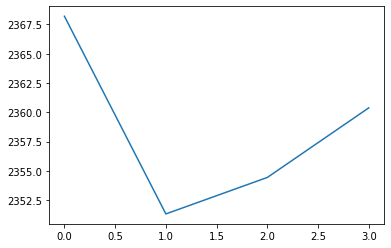

In [ ]:
TCS_pred=reg.predict(test_f)
print('predicted closing price for TCS are:')
print(TCS_pred)
plt.plot(TCS_pred)
print('real values: ')
print(y_t)

predicted closing price for INFY are:
[1061.3112 1048.2892 1039.0319 1046.7698]
real closing price: 
1346    701.20
1347    703.65
1348    713.90
1349    705.55
Name: Close, dtype: float64


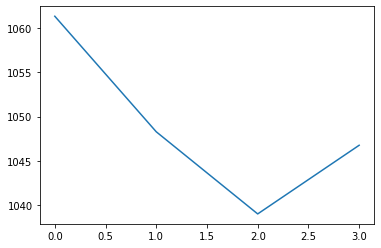

In [ ]:
INFY_pred=reg1.predict(test_f1)
print('predicted closing price for INFY are:')
print(INFY_pred)
plt.plot(INFY_pred)
print('real closing price: ')
print(y_t1)

**CONCLUSION:** From the above nested models we could observe the differences that arises in the MAE value due to different variations done in the model's hyperparameters using the hyperparameter tuning techniques.

In [ ]:
vol_shocks(TCS)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Year,Month,Day,WeekOfYear,vol_t+1,vol_shock
0,2015-01-01,TCS,EQ,2558.25,2567.0,2567.00,2541.00,2550.00,2545.55,2548.51,183415,4.674345e+13,8002,52870,0.2883,2015,1,1,1,NaN,0
1,2015-01-02,TCS,EQ,2545.55,2551.0,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+14,27585,309350,0.6683,2015,1,2,1,183415.0,1
2,2015-01-05,TCS,EQ,2579.45,2581.0,2599.90,2524.65,2538.10,2540.25,2563.94,877121,2.248886e+14,43234,456728,0.5207,2015,1,5,2,462870.0,1
3,2015-01-06,TCS,EQ,2540.25,2529.1,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,2.989615e+14,84503,714306,0.5894,2015,1,6,2,877121.0,1
4,2015-01-07,TCS,EQ,2446.60,2470.0,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,3.208362e+14,101741,886368,0.6724,2015,1,7,2,1211892.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,2020-06-15,TCS,EQ,2039.50,2039.1,2059.00,2000.95,2036.20,2029.90,2027.78,2399028,4.864707e+14,97163,621670,0.2591,2020,6,15,25,2842757.0,1
1346,2020-06-16,TCS,EQ,2029.90,2065.0,2073.95,2031.00,2041.80,2045.80,2051.87,2146528,4.404388e+14,89213,753988,0.3513,2020,6,16,25,2399028.0,1
1347,2020-06-17,TCS,EQ,2045.80,2046.0,2058.85,2026.55,2048.00,2047.80,2042.73,2703546,5.522610e+14,92658,1286034,0.4757,2020,6,17,25,2146528.0,1
1348,2020-06-18,TCS,EQ,2047.80,2045.0,2059.20,2025.20,2036.20,2038.10,2039.63,1944471,3.966007e+14,77874,625354,0.3216,2020,6,18,25,2703546.0,1


In [ ]:
vol_shocks(INFY)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Year,Month,Day,WeekOfYear,vol_t+1,vol_shock
0,2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.90,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154,2015,1,1,1,NaN,0
1,2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.00,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371,2015,1,2,1,500691.0,1
2,2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.50,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370,2015,1,5,2,1694580.0,1
3,2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.10,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332,2015,1,6,2,2484256.0,0
4,2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.00,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270,2015,1,7,2,2416829.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,2020-06-15,INFY,EQ,692.05,693.00,704.40,685.25,688.05,687.55,692.55,7857344,5.441612e+14,105262,3195578,0.4067,2020,6,15,25,9796064.0,1
1346,2020-06-16,INFY,EQ,687.55,702.00,712.00,699.15,700.00,701.20,705.08,10132423,7.144208e+14,170413,4145181,0.4091,2020,6,16,25,7857344.0,1
1347,2020-06-17,INFY,EQ,701.20,699.90,710.30,698.00,704.60,703.65,705.40,7291919,5.143753e+14,136959,3882325,0.5324,2020,6,17,25,10132423.0,1
1348,2020-06-18,INFY,EQ,703.65,708.20,716.60,706.00,713.40,713.90,711.84,6670206,4.748092e+14,174646,2816843,0.4223,2020,6,18,25,7291919.0,0


# **Model for predicting Volume shocks:**

In [ ]:
# Print the datatypes and count of the dataframe
print(TCS.dtypes)
print(TCS.count())

# Recheck the count
print(TCS.count())
# Separate the dataframe for input(X) and output variables(y)
XV = TCS.loc[:,'Prev Close':'Turnover']
yV = TCS.loc[:,'vol_shock']
# Set the validation size, i.e the test set to 20%
validation_size = 0.20
# Split the dataset to test and train sets
# Split the initial 70% of the data as training set and the remaining 30% data as the testing set
train_size = int(len(XV.index) * 0.7)
print(len(yV))
print(train_size)
Xtrain, Xtest = XV.loc[0:train_size, :], XV.loc[train_size: len(X1.index), :]
ytrain, ytest = yV[0:train_size+1], yV.loc[train_size: len(X1.index)]

from sklearn.model_selection import KFold  

#kf = KFold(n_splits=3,shuffle=True)
#kf.get_n_splits(X1)

#print(kf)  

#(n_splits=3, random_state=None, shuffle=True)
#for train_index, test_index in kf.split(X1):
    #print("TRAIN:", train_index, "TEST:", test_index)
    #X_train1, X_test1 = X1[train_index], X1[test_index]
    #y_train1, y_test1 = y1[train_index], y1[test_index]
print('Observations: %d' % (len(XV.index)))
print('X Training Observations: %d' % (len(Xtrain.index)))
print('X Testing Observations: %d' % (len(Xtest.index)))
print('y Training Observations: %d' % (len(ytrain)))
print('y Testing Observations: %d' % (len(ytest)))

Date                  datetime64[ns]
Symbol                        object
Series                        object
Prev Close                   float64
Open                         float64
High                         float64
Low                          float64
Last                         float64
Close                        float64
VWAP                         float64
Volume                         int64
Turnover                     float64
Trades                         int64
Deliverable Volume             int64
%Deliverble                  float64
Year                           int64
Month                          int64
Day                            int64
WeekOfYear                     int64
vol_t+1                      float64
vol_shock                      int64
dtype: object
Date                  1350
Symbol                1350
Series                1350
Prev Close            1350
Open                  1350
High                  1350
Low                   1350
Last                

In [ ]:
# prepare the model LDA
scaler = StandardScaler().fit(Xtrain)
rescaledXv = scaler.transform(Xtrain)
model_lda = LinearDiscriminantAnalysis()
model_lda.fit(rescaledXv, ytrain)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(Xtest)
predictions = model_lda.predict(rescaledValidationX)
print("accuracy score:")
print(accuracy_score(ytest, predictions))
print("confusion matrix: ")
print(confusion_matrix(ytest, predictions))
print("classification report: ")
print(classification_report(ytest, predictions))


accuracy score:
0.7955665024630542
confusion matrix: 
[[  0  83]
 [  0 323]]
classification report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        83
           1       0.80      1.00      0.89       323

    accuracy                           0.80       406
   macro avg       0.40      0.50      0.44       406
weighted avg       0.63      0.80      0.70       406



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:

model_xgbv = XGBClassifier()
model_xgbv.fit(rescaledXv, ytrain)
# estimate accuracy on validation dataset
rescaledValidationXv = scaler.transform(Xtest)
predictions = model_xgbv.predict(rescaledValidationX)
print("accuracy score:")
print(accuracy_score(ytest, predictions))
print("confusion matrix: ")
print(confusion_matrix(ytest, predictions))
print("classification report: ")
print(classification_report(ytest, predictions))

accuracy score:
0.7931034482758621
confusion matrix: 
[[  3  80]
 [  4 319]]
classification report: 
              precision    recall  f1-score   support

           0       0.43      0.04      0.07        83
           1       0.80      0.99      0.88       323

    accuracy                           0.79       406
   macro avg       0.61      0.51      0.48       406
weighted avg       0.72      0.79      0.72       406



roc auc is :0.5


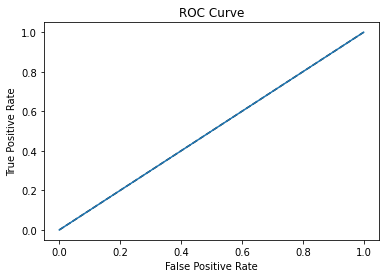

AUC using cross val: [0.38194444 0.53361345 0.49090909 0.23333333 0.37419355 0.38387097
 0.38871473 0.52688172 0.50980392 0.40571429]
Mean AUC score is: 0.4228979491449392


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [ ]:
y_pred_proba = model_lda.predict_proba(Xtest)[:,1]
fpr, tpr, thresholds = roc_curve(ytest, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
print("roc auc is :" + str(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# AUC score using cross validation
kfold_val = KFold(n_splits=num_folds, random_state=42)
auc_score = cross_val_score(model_lda, Xtest, ytest, cv=kfold_val, scoring='roc_auc')
print("AUC using cross val: " + str(auc_score))
mean_auc = np.mean(auc_score)
print("Mean AUC score is: " + str(mean_auc))

In [ ]:
# Various hyper-parameters to tune for TCS dataset
xgb_vol = XGBClassifier()

param = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [ 5, 6, 7, 8, 9, 10],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [200, 250, 450, 500, 550, 1000],
              'eval_metric':['mae']}

xgb_grid_vol = GridSearchCV(xgb_vol,
                        param,
                        cv = 3,
                        n_jobs = 5,
                        verbose=True)

xgb_grid_vol.fit(Xtrain, ytrain)

print(xgb_grid_vol.best_score_)
print(xgb_grid_vol.best_params_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   32.2s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  3.0min
[Parallel(n_jobs=5)]: Done 324 out of 324 | elapsed:  5.3min finished


0.8201058201058201
{'colsample_bytree': 0.7, 'eval_metric': 'mae', 'learning_rate': 0.03, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 200, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [ ]:
xgb_vol_final = XGBClassifier(colsample_bytree= 0.7, learning_rate = 0.03, max_depth= 5, min_child_weight=4, n_estimators= 200, nthread= 4, objective= 'reg:linear', silent= 1, subsample=0.7)
xgb_vol_final.fit(Xtrain,ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=0.03, max_delta_step=0, max_depth=5,
              min_child_weight=4, missing=None, n_estimators=200, n_jobs=1,
              nthread=4, objective='reg:linear', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
              subsample=0.7, verbosity=1)

In [ ]:
pred = xgb_vol_final.predict(Xtest)
print("accuracy score:")
print(accuracy_score(ytest, pred))

accuracy score:
0.7857142857142857


# CONCLUSION:-
In the above cells i have nested a model which is mainly a classifier that can predict the volume shocks depending upon the given input data with an accuracy score of 0.783. 